<a href="https://colab.research.google.com/github/varshitha-janagani/NLP/blob/main/NLP_ASS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy matplotlib pandas
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from spacy.matcher import Matcher


In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
abstracts = [
    "Deep learning methods have significantly improved computer vision tasks such as image classification and object detection.",
    "We propose a novel transformer-based architecture for natural language processing tasks.",
    "Reinforcement learning has been applied to robotics and autonomous systems with promising results.",
    "This paper presents a scalable distributed system for large-scale machine learning."
]


In [5]:
doc = nlp(abstracts[0])

tokens = [token.text for token in doc]
print("Tokens:")
print(tokens)


Tokens:
['Deep', 'learning', 'methods', 'have', 'significantly', 'improved', 'computer', 'vision', 'tasks', 'such', 'as', 'image', 'classification', 'and', 'object', 'detection', '.']


In [6]:
docs = list(nlp.pipe(abstracts))

In [7]:
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

np_freq = Counter(noun_phrases)
print("Top Noun Phrases:")
print(np_freq.most_common(10))

Top Noun Phrases:
[('deep learning methods', 1), ('computer vision tasks', 1), ('image classification', 1), ('object detection', 1), ('we', 1), ('a novel transformer-based architecture', 1), ('natural language processing tasks', 1), ('reinforcement learning', 1), ('robotics', 1), ('autonomous systems', 1)]


In [9]:
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

ent_freq = Counter([ent[1] for ent in entities])
print("Entity Frequency:")
print(ent_freq)

Entity Frequency:
Counter()


In [10]:
matcher = Matcher(nlp.vocab)

pattern1 = [{"POS": "ADJ"}, {"POS": "NOUN"}]
pattern2 = [{"POS": "NOUN"}, {"POS": "NOUN"}]

matcher.add("TECH_TERMS", [pattern1, pattern2])

In [11]:
matched_terms = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        matched_terms.append(doc[start:end].text.lower())

print("Matched Technical Terms:")
print(Counter(matched_terms).most_common(10))


Matched Technical Terms:
[('deep learning', 1), ('learning methods', 1), ('computer vision', 1), ('vision tasks', 1), ('image classification', 1), ('object detection', 1), ('novel transformer', 1), ('natural language', 1), ('language processing', 1), ('processing tasks', 1)]


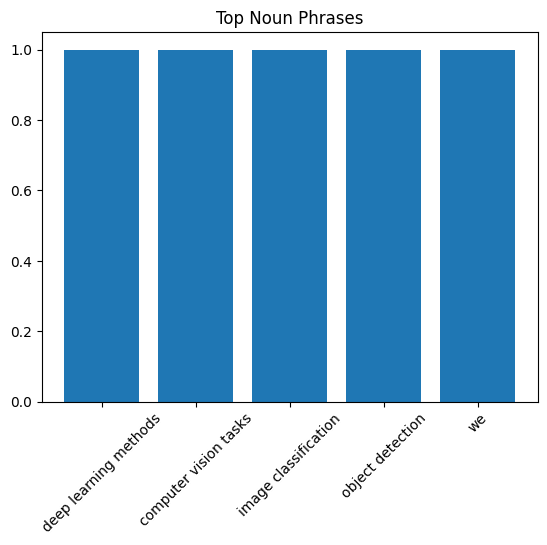

In [12]:
top_np = np_freq.most_common(5)
labels, values = zip(*top_np)

plt.bar(labels, values)
plt.title("Top Noun Phrases")
plt.xticks(rotation=45)
plt.show()


In [14]:
if ent_freq:
    labels, values = zip(*ent_freq.items())
    plt.bar(labels, values)
    plt.title("Named Entity Distribution")
    plt.show()
else:
    print("No named entities found to plot.")

No named entities found to plot.


In [15]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

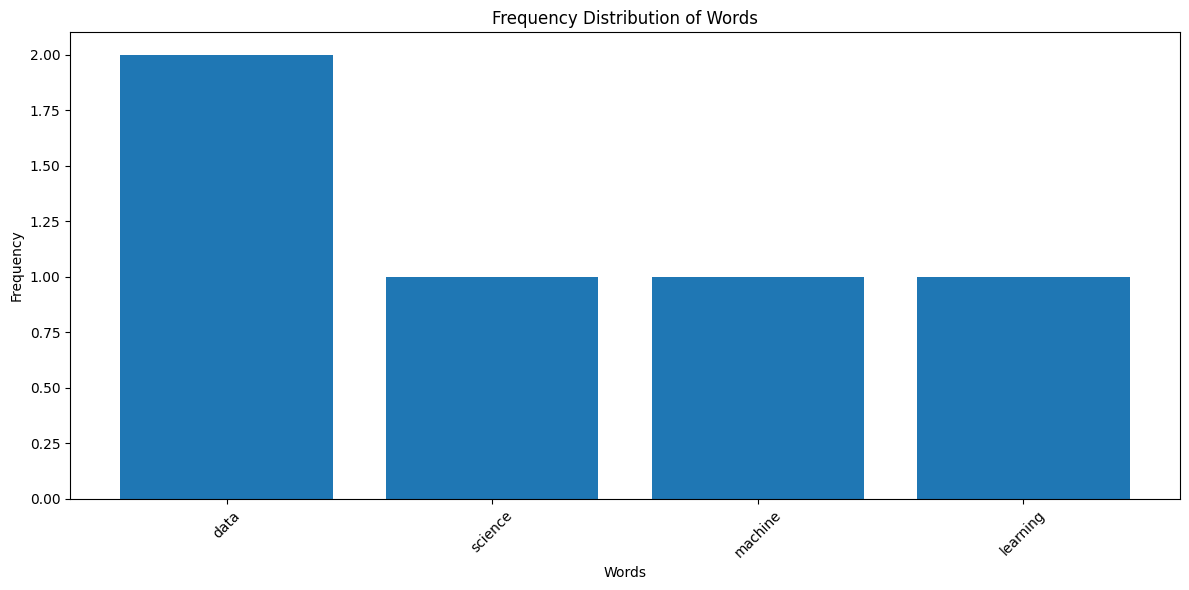

In [22]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Example data
df = pd.DataFrame({
    'lemmatized_summaries': [
        ['data', 'science'],
        ['machine', 'learning', 'data']
    ]
})

all_words = []
for summary_list in df['lemmatized_summaries']:
    all_words.extend(summary_list)

word_freq = Counter(all_words)

words = list(word_freq.keys())
frequencies = list(word_freq.values())

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.title('Frequency Distribution of Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
df = pd.read_csv(
    '/content/arxiv_data.csv',
    engine='python',
    nrows=1000
)

print(df.head())

                                              titles  \
0  Survey on Semantic Stereo Matching / Semantic ...   
1  FUTURE-AI: Guiding Principles and Consensus Re...   
2  Enforcing Mutual Consistency of Hard Regions f...   
3  Parameter Decoupling Strategy for Semi-supervi...   
4  Background-Foreground Segmentation for Interio...   

                                           summaries  \
0  Stereo matching is one of the widely used tech...   
1  The recent advancements in artificial intellig...   
2  In this paper, we proposed a novel mutual cons...   
3  Consistency training has proven to be an advan...   
4  To ensure safety in automated driving, the cor...   

                         terms  
0           ['cs.CV', 'cs.LG']  
1  ['cs.CV', 'cs.AI', 'cs.LG']  
2           ['cs.CV', 'cs.AI']  
3                    ['cs.CV']  
4           ['cs.CV', 'cs.LG']  


In [24]:
def preprocess_text(text):
    if pd.isna(text):
        return ""

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F1E0-\U0001F1FF"
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # Remove special characters (keep alphanumeric and spaces)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [25]:
df['processed_summaries'] = df['summaries'].apply(preprocess_text)


In [26]:
df['tokenized_summaries'] = df['processed_summaries'].apply(
    lambda x: word_tokenize(x)
)


In [27]:
df['tokenized_summaries'] = df['processed_summaries'].apply(
    lambda x: word_tokenize(x)
)


In [28]:
stop_words = set(stopwords.words('english'))

df['filtered_summaries'] = df['tokenized_summaries'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)



In [29]:
lemmatizer = WordNetLemmatizer()

df['lemmatized_summaries'] = df['filtered_summaries'].apply(
    lambda tokens: [lemmatizer.lemmatize(word) for word in tokens]
)


In [31]:
df['clean_summaries'] = df['lemmatized_summaries'].apply(
    lambda tokens: ' '.join(tokens)
)

In [32]:
def nltk_preprocessing_pipeline(text):
    text = preprocess_text(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

In [33]:
df['clean_summaries_pipeline'] = df['summaries'].apply(
    nltk_preprocessing_pipeline
)


In [34]:
df[['summaries', 'clean_summaries', 'clean_summaries_pipeline']].head()

,summaries,clean_summaries,clean_summaries_pipeline
0,Stereo matching is one of the widely used tech...,stereo matching one widely used technique infe...,stereo matching one widely used technique infe...
1,The recent advancements in artificial intellig...,recent advancement artificial intelligence ai ...,recent advancement artificial intelligence ai ...
2,"In this paper, we proposed a novel mutual cons...",paper proposed novel mutual consistency networ...,paper proposed novel mutual consistency networ...
3,Consistency training has proven to be an advan...,consistency training proven advanced semisuper...,consistency training proven advanced semisuper...
4,"To ensure safety in automated driving, the cor...",ensure safety automated driving correct percep...,ensure safety automated driving correct percep...


In [35]:
print(df.columns.tolist())

['titles', 'summaries', 'terms', 'processed_summaries', 'tokenized_summaries', 'filtered_summaries', 'lemmatized_summaries', 'clean_summaries', 'clean_summaries_pipeline']


In [37]:
# ==============================
# ALL-IN-ONE NLTK + spaCy CODE
# ==============================

# --------- Imports ----------
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from spacy.matcher import Matcher

# --------- NLTK Downloads ----------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# --------- Load Dataset ----------
df = pd.read_csv('/content/arxiv_data.csv', engine='python', nrows=1000)

# --------- Text Cleaning Function ----------
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --------- NLTK Pipeline ----------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


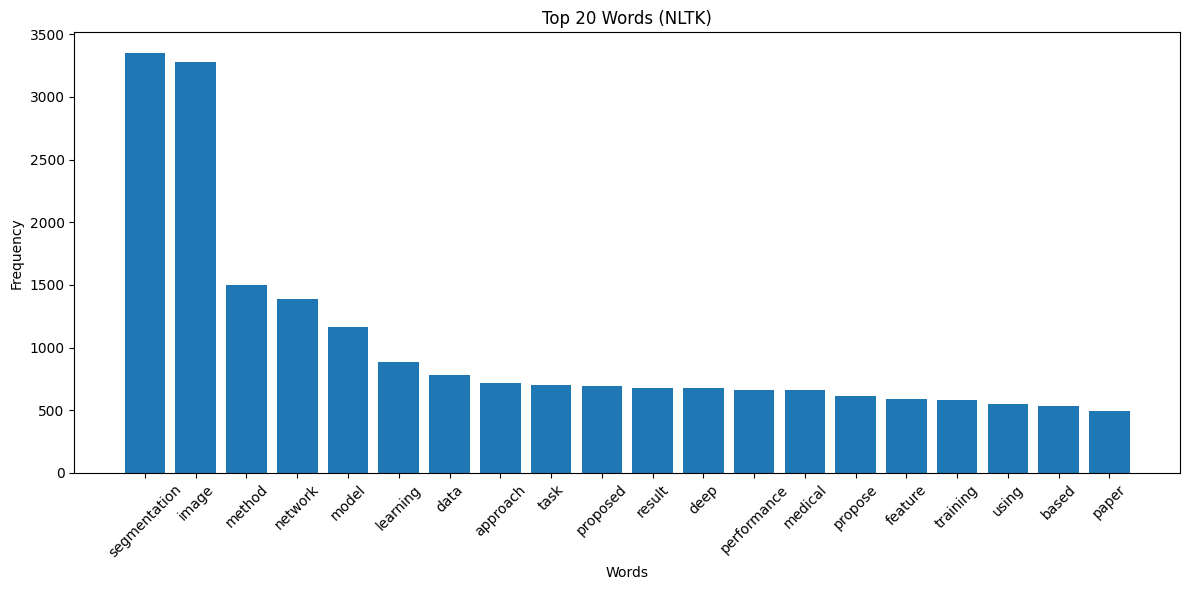

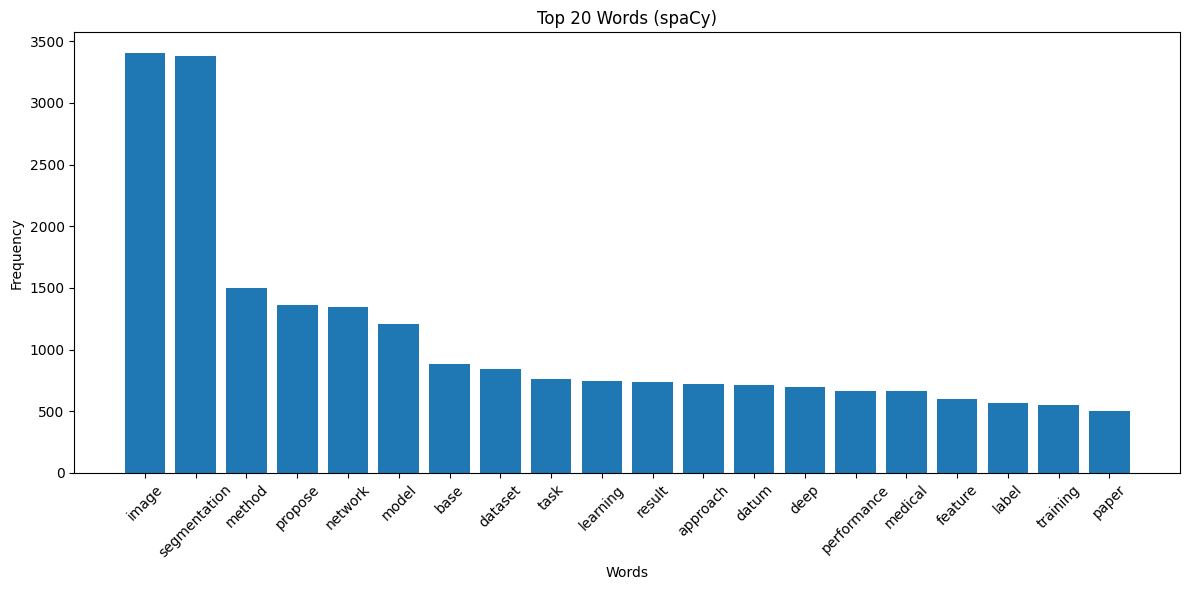

Top Noun Phrases (spaCy):
[('we', 2602), ('which', 840), ('that', 692), ('it', 493), ('this paper', 428), ('the-art', 382), ('image segmentation', 259), ('our method', 215), ('-', 197), ('segmentation', 181)]

Named Entity Distribution (spaCy):
Counter({'ORG': 2690, 'CARDINAL': 1668, 'PERSON': 367, 'PERCENT': 331, 'ORDINAL': 324, 'GPE': 238, 'DATE': 199, 'NORP': 124, 'PRODUCT': 85, 'MONEY': 57, 'TIME': 31, 'WORK_OF_ART': 30, 'FAC': 26, 'QUANTITY': 24, 'LOC': 18, 'LAW': 9, 'EVENT': 6})

Top Matched Technical Terms:
[('medical image', 335), ('deep learning', 251), ('semantic segmentation', 204), ('neural networks', 137), ('neural network', 123), ('experimental results', 99), ('semantic image', 94), ('medical images', 82), ('medical imaging', 64), ('supervised learning', 55)]


,summaries,clean_text
0,Stereo matching is one of the widely used tech...,stereo matching one widely used technique infe...
1,The recent advancements in artificial intellig...,recent advancement artificial intelligence ai ...
2,"In this paper, we proposed a novel mutual cons...",paper proposed novel mutual consistency networ...
3,Consistency training has proven to be an advan...,consistency training proven advanced semisuper...
4,"To ensure safety in automated driving, the cor...",ensure safety automated driving correct percep...


In [40]:
# ==============================
# ALL-IN-ONE NLTK + spaCy CODE
# ==============================

# --------- Imports ----------
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from spacy.matcher import Matcher

# --------- NLTK Downloads ----------
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# --------- Load Dataset ----------
df = pd.read_csv('/content/arxiv_data.csv', engine='python', nrows=1000)

# --------- Text Cleaning Function ----------
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --------- NLTK Pipeline ----------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['processed'] = df['summaries'].apply(preprocess_text)
df['tokens'] = df['processed'].apply(word_tokenize)
df['filtered'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
df['lemmatized'] = df['filtered'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
df['clean_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

# --------- NLTK Frequency Bar Chart ----------
all_words = []
for words in df['lemmatized']:
    all_words.extend(words)

fdist = FreqDist(all_words)
common_words = fdist.most_common(20)
words, freqs = zip(*common_words)

plt.figure(figsize=(12,6))
plt.bar(words, freqs)
plt.xticks(rotation=45)
plt.title("Top 20 Words (NLTK)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ==============================
# spaCy PIPELINE
# ==============================

# --------- Load spaCy Model ----------
nlp = spacy.load("en_core_web_sm")

# --------- Process Text ----------
docs = list(nlp.pipe(df['summaries'].astype(str)))

# --------- spaCy Tokens ----------
spacy_tokens = []
for doc in docs:
    spacy_tokens.extend([
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ])

# --------- spaCy Frequency Bar Chart ----------
freq_spacy = Counter(spacy_tokens).most_common(20)
words_s, counts_s = zip(*freq_spacy)

plt.figure(figsize=(12,6))
plt.bar(words_s, counts_s)
plt.xticks(rotation=45)
plt.title("Top 20 Words (spaCy)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --------- spaCy Noun Phrases ----------
noun_phrases = []
for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

print("Top Noun Phrases (spaCy):")
print(Counter(noun_phrases).most_common(10))

# --------- spaCy Named Entities ----------
entities = []
for doc in docs:
    for ent in doc.ents:
        entities.append(ent.label_)

print("\nNamed Entity Distribution (spaCy):")
print(Counter(entities))

# --------- spaCy Matcher ----------
matcher = Matcher(nlp.vocab)
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}]
matcher.add("TECH_TERM", [pattern])

matched_terms = []
for doc in docs:
    for match_id, start, end in matcher(doc):
        matched_terms.append(doc[start:end].text.lower())

print("\nTop Matched Technical Terms:")
print(Counter(matched_terms).most_common(10))

# --------- Final Preview ----------
df[['summaries', 'clean_text']].head()

In [43]:
df = pd.read_csv(
    '/content/arxiv_data.csv',
    engine='python',
    nrows=1000
)[["summaries"]].dropna()
df = df.reset_index(drop=True)
df["doc_id"] = df.index


# ---------- FUNCTIONS ----------
def tokenize(df):
    return pd.DataFrame({
        "doc_id": df["doc_id"],
        "tokenized": df["summaries"].apply(word_tokenize)
    })

def remove_stopwords(token_df):
    sw = set(stopwords.words("english"))
    return pd.DataFrame({
        "doc_id": token_df["doc_id"],
        "filtered": token_df["tokenized"].apply(
            lambda w: [i.lower() for i in w if i.isalpha() and i.lower() not in sw]
        )
    })

def lemmatize(filtered_df):
    lem = WordNetLemmatizer()
    return pd.DataFrame({
        "doc_id": filtered_df["doc_id"],
        "lemmatized": filtered_df["filtered"].apply(
            lambda w: [lem.lemmatize(i) for i in w]
        )
    })

def rejoin(lemma_df):
    return pd.DataFrame({
        "doc_id": lemma_df["doc_id"],
        "clean_summaries": lemma_df["lemmatized"].apply(lambda w: " ".join(w))
    })
def pos_tag(clean_df):
    rows = []
    for i, text in zip(clean_df["doc_id"], clean_df["clean_summaries"]):
        doc = nlp(text)
        rows.append({
            "doc_id": i,
            "pos_tags": [(t.text, t.pos_) for t in doc]
        })
    return pd.DataFrame(rows)
# ---------- APPLY + MERGE ----------
merged_df = (
    df
    .merge(tokenize(df), on="doc_id")
    .merge(remove_stopwords(tokenize(df)), on="doc_id")
    .merge(lemmatize(remove_stopwords(tokenize(df))), on="doc_id")
    .merge(rejoin(lemmatize(remove_stopwords(tokenize(df)))), on="doc_id")
    .merge(pos_tag(rejoin(lemmatize(remove_stopwords(tokenize(df))))), on="doc_id")
)

merged_df.head()

,summaries,doc_id,tokenized,filtered,lemmatized,clean_summaries,pos_tags
0,Stereo matching is one of the widely used tech...,0,"[Stereo, matching, is, one, of, the, widely, u...","[stereo, matching, one, widely, used, techniqu...","[stereo, matching, one, widely, used, techniqu...",stereo matching one widely used technique infe...,"[(stereo, PROPN), (matching, VERB), (one, NUM)..."
1,The recent advancements in artificial intellig...,1,"[The, recent, advancements, in, artificial, in...","[recent, advancements, artificial, intelligenc...","[recent, advancement, artificial, intelligence...",recent advancement artificial intelligence ai ...,"[(recent, ADJ), (advancement, NOUN), (artifici..."
2,"In this paper, we proposed a novel mutual cons...",2,"[In, this, paper, ,, we, proposed, a, novel, m...","[paper, proposed, novel, mutual, consistency, ...","[paper, proposed, novel, mutual, consistency, ...",paper proposed novel mutual consistency networ...,"[(paper, NOUN), (proposed, VERB), (novel, ADJ)..."
3,Consistency training has proven to be an advan...,3,"[Consistency, training, has, proven, to, be, a...","[consistency, training, proven, advanced, fram...","[consistency, training, proven, advanced, fram...",consistency training proven advanced framework...,"[(consistency, NOUN), (training, NOUN), (prove..."
4,"To ensure safety in automated driving, the cor...",4,"[To, ensure, safety, in, automated, driving, ,...","[ensure, safety, automated, driving, correct, ...","[ensure, safety, automated, driving, correct, ...",ensure safety automated driving correct percep...,"[(ensure, VERB), (safety, NOUN), (automated, V..."


In [45]:
#by the pipeline method using functions
# =============== ALL OPERATIONS BY CALLING ONE FUNCTION ===============

import pandas as pd
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Load spaCy
nlp = spacy.load("en_core_web_sm")


def full_text_pipeline(filepath='/content/arxiv_data.csv', rows=1000):
    # Load data
    df = pd.read_csv(filepath, engine='python', nrows=rows)[["summaries"]].dropna()
    df = df.reset_index(drop=True)
    df["doc_id"] = df.index

    # Tokenization
    token_df = pd.DataFrame({
        "doc_id": df["doc_id"],
        "tokenized": df["summaries"].apply(word_tokenize)
    })

    # Stopword removal
    sw = set(stopwords.words("english"))
    stop_df = pd.DataFrame({
        "doc_id": token_df["doc_id"],
        "filtered": token_df["tokenized"].apply(
            lambda w: [i.lower() for i in w if i.isalpha() and i.lower() not in sw]
        )
    })
  # Lemmatization
    lem = WordNetLemmatizer()
    lemma_df = pd.DataFrame({
        "doc_id": stop_df["doc_id"],
        "lemmatized": stop_df["filtered"].apply(
            lambda w: [lem.lemmatize(i) for i in w]
        )
    })

    # Rejoin
    clean_df = pd.DataFrame({
        "doc_id": lemma_df["doc_id"],
        "clean_summaries": lemma_df["lemmatized"].apply(lambda w: " ".join(w))
    })

    # POS tagging (spaCy)
    pos_df = pd.DataFrame({
        "doc_id": clean_df["doc_id"],
        "pos_tags": clean_df["clean_summaries"].apply(
            lambda text: [(t.text, t.pos_) for t in nlp(text)]
        )
    })

    # Merge all
    final_df = (
        df
        .merge(token_df, on="doc_id")
        .merge(stop_df, on="doc_id")
        .merge(lemma_df, on="doc_id")
        .merge(clean_df, on="doc_id")
        .merge(pos_df, on="doc_id")
    )

    return final_df


# -------- FUNCTION CALL --------
result_df = full_text_pipeline(filepath='/content/arxiv_data.csv')
result_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,summaries,doc_id,tokenized,filtered,lemmatized,clean_summaries,pos_tags
0,Stereo matching is one of the widely used tech...,0,"[Stereo, matching, is, one, of, the, widely, u...","[stereo, matching, one, widely, used, techniqu...","[stereo, matching, one, widely, used, techniqu...",stereo matching one widely used technique infe...,"[(stereo, PROPN), (matching, VERB), (one, NUM)..."
1,The recent advancements in artificial intellig...,1,"[The, recent, advancements, in, artificial, in...","[recent, advancements, artificial, intelligenc...","[recent, advancement, artificial, intelligence...",recent advancement artificial intelligence ai ...,"[(recent, ADJ), (advancement, NOUN), (artifici..."
2,"In this paper, we proposed a novel mutual cons...",2,"[In, this, paper, ,, we, proposed, a, novel, m...","[paper, proposed, novel, mutual, consistency, ...","[paper, proposed, novel, mutual, consistency, ...",paper proposed novel mutual consistency networ...,"[(paper, NOUN), (proposed, VERB), (novel, ADJ)..."
3,Consistency training has proven to be an advan...,3,"[Consistency, training, has, proven, to, be, a...","[consistency, training, proven, advanced, fram...","[consistency, training, proven, advanced, fram...",consistency training proven advanced framework...,"[(consistency, NOUN), (training, NOUN), (prove..."
4,"To ensure safety in automated driving, the cor...",4,"[To, ensure, safety, in, automated, driving, ,...","[ensure, safety, automated, driving, correct, ...","[ensure, safety, automated, driving, correct, ...",ensure safety automated driving correct percep...,"[(ensure, VERB), (safety, NOUN), (automated, V..."


# Task
Correct the file path from `/content/arxiv_data.csv.zip` to `/content/arxiv_data.csv` in the `pd.read_csv` function in the last executed cell to resolve the `FileNotFoundError`.

## Correct file path

### Subtask:
Modify the file path in `pd.read_csv` from `/content/arxiv_data.csv.zip` to `/content/arxiv_data.csv` to resolve the `FileNotFoundError`.


## Summary:

### Data Analysis Key Findings
No data analysis findings are available as the current step focuses on correcting a file path error.

### Insights or Next Steps
*   The immediate next step is to execute the corrected `pd.read_csv` function to successfully load the dataset.
*   Once the data is loaded, proceed with the intended data analysis tasks.
